In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Salary.csv")
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
df.isnull().sum()


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df["Age"].fillna(df["Age"].mean())
df["Years of Experience"].fillna(df["Years of Experience"].mean())
df["Gender"].fillna(df["Gender"].mode()[0])
df["Education Level"].fillna(df["Education Level"].mode()[0])
df["Job Title"].fillna(df["Job Title"].mode()[0])
df = df.dropna(subset=["Salary"])

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Job Title'] = le.fit_transform(df['Job Title'])

df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


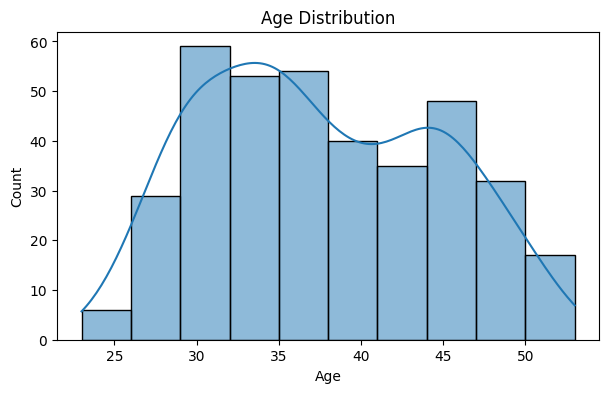

In [9]:
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


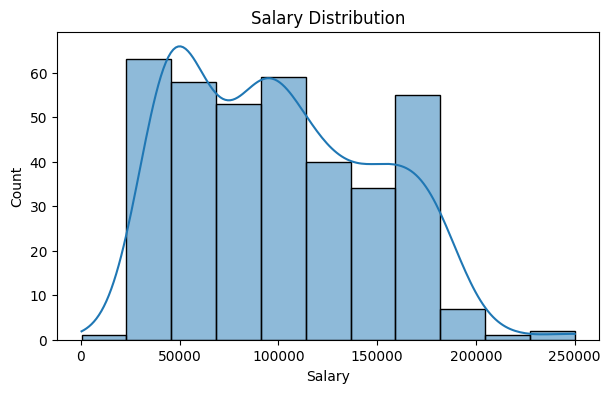

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()


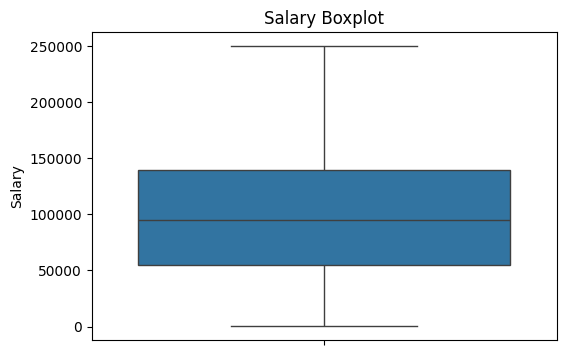

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Salary'])
plt.title("Salary Boxplot")
plt.show()

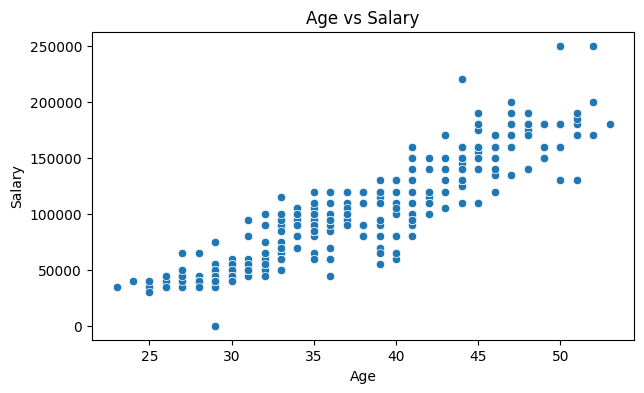

In [12]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Age vs Salary")
plt.show()

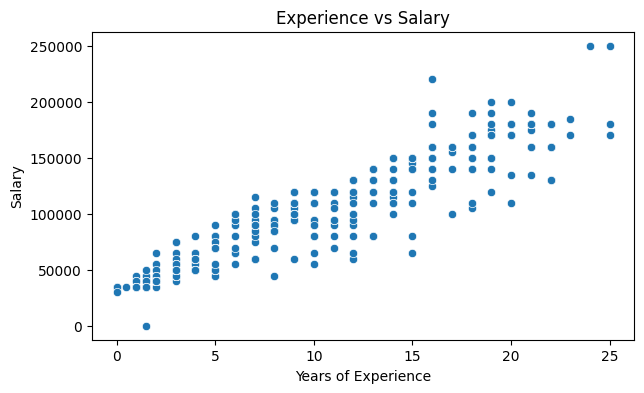

In [13]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title("Experience vs Salary")
plt.show()

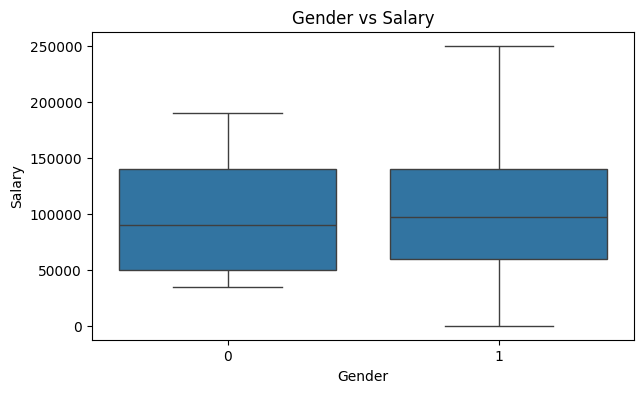

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title("Gender vs Salary")
plt.show()

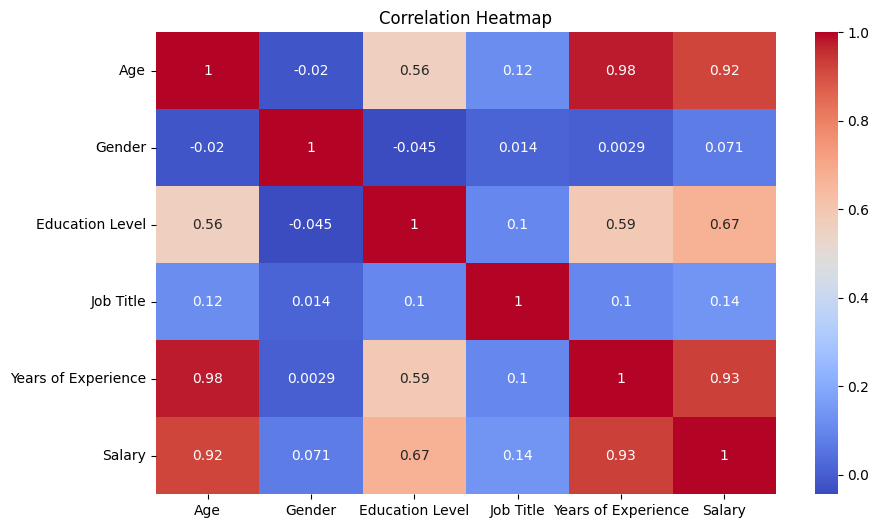

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

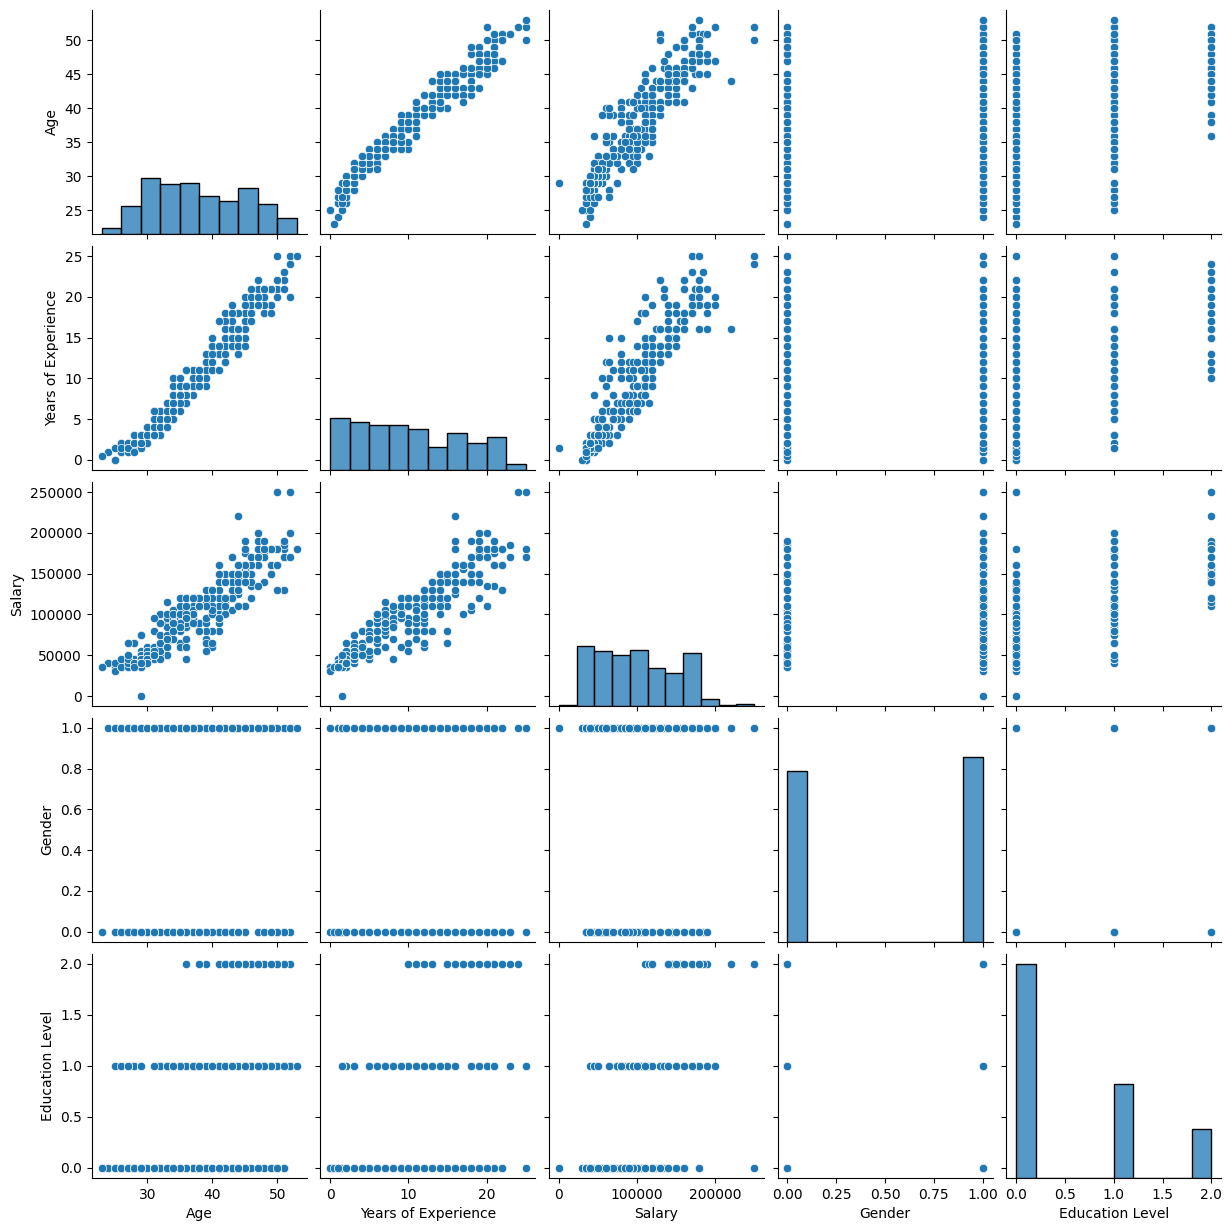

In [16]:
sns.pairplot(df[['Age','Years of Experience','Salary','Gender','Education Level']])
plt.show()

In [17]:
X = df[['Age','Gender','Education Level','Years of Experience']]
y = df['Salary']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

In [22]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

MAE : 10613.910121260109
MSE : 232595028.5296489
RMSE: 15251.06647187825
R²  : 0.9029876738433329


In [23]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Age,24616.094533
Gender,3802.940602
Education Level,10728.963626
Years of Experience,13648.159540
